###                    Capstone 1 Analytic Report and Research Proposal
                
                             Colleen  Chen


## Dataset   "Equity Prices of index SP500, Stock Apple & Mastercard"

      The dataset is 2 year daily historical data of equity index SP500, stock Apple and Mastercard. The dataset contains the prices of equity high, low, open and close, and daily trading volume. With the dataset, we can study correlations, time-series of equity prices, volatilities and sharp ratio return/risk.
     
#The three analytic questions for this research report are

    1. What are correlation matrix among three entities?
    2. What are volatilities?
    3. What is sharp ratio of each equity entity?
    
#The proposed further research:

    1. Using time-series model, to forecast future prices.


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
#matplotlib inline

In [2]:
df_spy = pd.read_csv('../data-101/SPY.csv')
df_aapl = pd.read_csv('../data-101/AAPL.csv')
df_ma = pd.read_csv('../data-101/MA.csv')

#  Time-series price plot for SP500, AAPl, MA

Text(0.5,1,'Daily Close Price from 12/05/16 to 12/04/18')

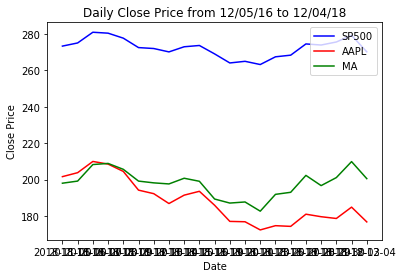

In [4]:
normalization_factor = 210.0 / 280.0
plt.plot(df_spy['Date'], df_spy['Close'], c='blue', label='SP500')
plt.legend(loc='upper right')
plt.plot(df_aapl['Date'], df_aapl['Close'], c='red', label='AAPL')
plt.legend(loc='upper right')
plt.plot(df_ma['Date'], df_ma['Close'], c='green', label='MA')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Daily Close Price from 12/05/16 to 12/04/18')

#  The correlations between pair are very useful informations.




In [5]:
corr_SP_AAPL = np.corrcoef(x=df_spy['Close'][1:], y=df_aapl['Close'][1:])

In [6]:
corr_SP_MA = np.corrcoef(x=df_spy['Close'][1:], y=df_ma['Close'][1:])

In [7]:
corr_AAPL_MA = np.corrcoef(x=df_aapl['Close'][1:], y=df_ma['Close'][1:])

In [8]:
corrMat = np.ones([3, 3], float)
corrMat[0, 1] = corr_SP_AAPL[0, 1]
corrMat[1, 0] = corr_SP_AAPL[0, 1]
corrMat[0, 2] = corr_SP_MA[0, 1]
corrMat[2, 0] = corr_SP_MA[0, 1]
corrMat[1, 2] = corr_AAPL_MA[0, 1]
corrMat[2, 1] = corr_AAPL_MA[0, 1]

In [9]:
print(corrMat)

[[1.         0.75060411 0.95269661]
 [0.75060411 1.         0.67162593]
 [0.95269661 0.67162593 1.        ]]


##   Correlation Matrix

         SP           AAPL           MA
         -----------------------------------------
     SP  |1.          0.75060411      0.95269661  |
         |                                        |
     AAPL|0.75060411  1.              0.67162593  |
         |                                        |
     MA  |0.95269661  0.67162593       1.         |
         ------------------------------------------



##  The historical volatilities

In [10]:
std_SP = np.std(df_spy['Close'], ddof=1) / np.mean(df_spy['Close'])

In [11]:
std_AAPL = np.std(df_aapl['Close'], ddof=1) / np.mean(df_aapl['Close'])

In [12]:
std_MA = np.std(df_ma['Close'], ddof=1) / np.mean(df_ma['Close'])

In [13]:
print('SP500 volatility is {}'.format(std_SP))
print('AAPL volatility is {}'.format(std_AAPL))
print('MA volatility is {}'.format(std_MA))

SP500 volatility is 0.018568097572645173
AAPL volatility is 0.06428619408204693
MA volatility is 0.03697714734494922


## The daily return ratio

In [14]:
return_SP = (df_spy['Close'][1:].values - df_spy['Close'][:-1].values) / df_spy['Close'][:-1].values
return_SP = pd.Series(return_SP, index=df_spy['Date'][1:])

In [15]:
return_AAPL = (df_aapl['Close'][1:].values - df_aapl['Close'][:-1].values) / df_aapl['Close'][:-1].values
return_AAPL = pd.Series(return_AAPL, index=df_aapl['Date'][1:])

In [16]:
return_MA = (df_ma['Close'][1:].values - df_ma['Close'][:-1].values) / df_ma['Close'][:-1].values
return_MA = pd.Series(return_MA, index=df_ma['Date'][1:])

In [17]:
return_SP.head()

Date
2018-11-06    0.006328
2018-11-07    0.021409
2018-11-08   -0.001815
2018-11-09   -0.009768
2018-11-12   -0.018685
dtype: float64

Text(0.5,1,'Daily Return from 12/05/16 to 12/04/18')

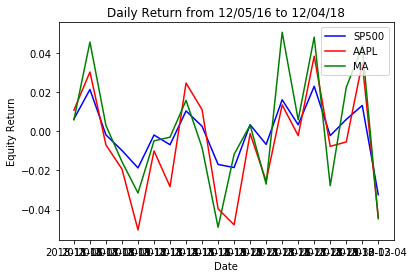

In [21]:
plt.plot(return_SP, c='blue', label='SP500')
plt.legend(loc='upper right')
plt.plot(return_AAPL, c='red', label='AAPL')
plt.legend(loc='upper right')
plt.plot(return_MA, c='green', label='MA')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Equity Return')
plt.title('Daily Return from 12/05/16 to 12/04/18')

## The above describe the various analytic attributions.

##  future research:   Using time-series model, to forecast future prices.